# Problem Statement
Insurance premiums are often based on various factors that in the end decide the amount that will be covered from the insurance company. As a data analyst/scientist you are given a set of historical data for an organizations customers and the respective charges that were levied upon the insurance company.

The objective of proposed work is to predict the insurance charges of a person and identify those patients with health insurance policy and medical details weather they have any health issues or not.

The data gives you the information about the users including their age, sex, bmi, hospitalization history, annual income, etc. Analyze and gather insights fron the data and create a linear regression model that will best predict the insurance charges for a new set of data.

This kind of model is useful for insurance companies to determine the yearly insurance premium charges for a person

In [ ]:
1.Import all essential libraries
2.Data loading
3.EDA :- Exploratory Data Analysis
    i) treating null values ii)Duplicate values iii)outliers iv)multicollinearity(VIF)
4.Data Visualisation
5.Feature selection- x(independent feature), y(dependent feature)
6.Model creation

In [2]:
## Import all essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
##Data Loading
df=pd.read_csv("new_insurance_data (7) (2).csv")

In [6]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [7]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [8]:
df.tail()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,170380500.5,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,201515184.8,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,223644981.3,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,252892382.6,3.0,4.006359e+09,southeast,62592.87309
1337,54.0,female,47.410,0.0,yes,63982.80926,31.0,1100328.0,261631699.3,3.0,4.117197e+09,southeast,63770.42801


In [9]:
df.shape

(1338, 13)

In [11]:
##basic info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [12]:
df.describe(include='all')

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
count,1329.000000,1338,1335.000000,1333.000000,1338,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338,1338.000000
unique,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,male,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,southeast,NaN
freq,NaN,676,NaN,NaN,1064,NaN,NaN,NaN,NaN,NaN,NaN,364,NaN
mean,39.310008,NaN,30.665112,1.090773,NaN,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,NaN,13270.422265
std,14.034818,NaN,6.101690,1.201856,NaN,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,NaN,1121.873900
25%,27.000000,NaN,26.302500,0.000000,NaN,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,NaN,9382.033000
75%,51.000000,NaN,34.687500,2.000000,NaN,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,NaN,16639.912515


In [15]:
##Check the presence of null values
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [16]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [17]:
col=list(df.columns)

In [18]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [29]:
df['sex'].mode()[0]##mode of the data

'male'

In [30]:
df['children'].mean()##mean of the data

1.0907726931732933

In [31]:
df['children'].dtype

dtype('float64')

In [32]:
##df.dropna
##df.fillna(df[col_name].mean())

In [33]:
for col_name in col:
    if df[col_name].dtypes=='object':
        df[col_name]=df[col_name].fillna(df[col_name].mode()[0])
    else:
         df[col_name]=df[col_name].fillna(df[col_name].mean())

In [34]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [35]:
##Data visualisation

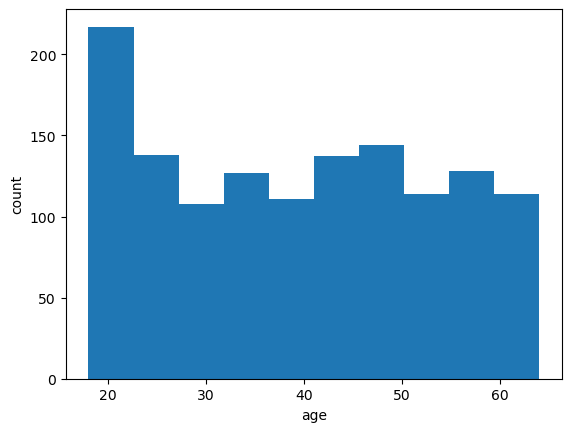

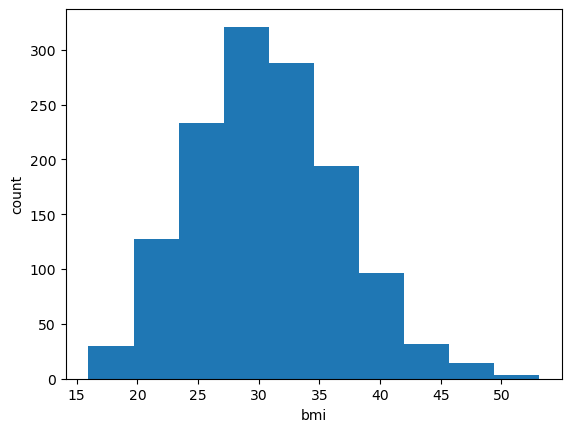

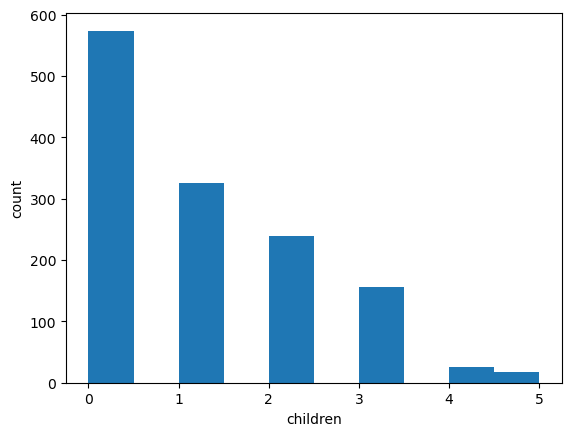

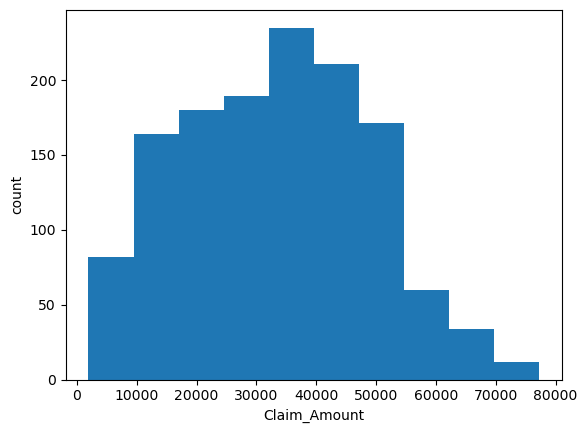

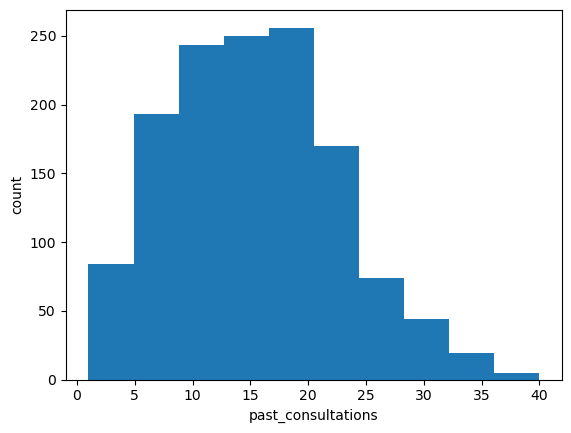

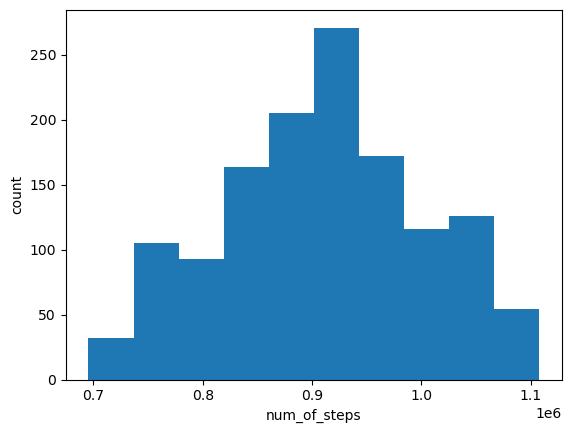

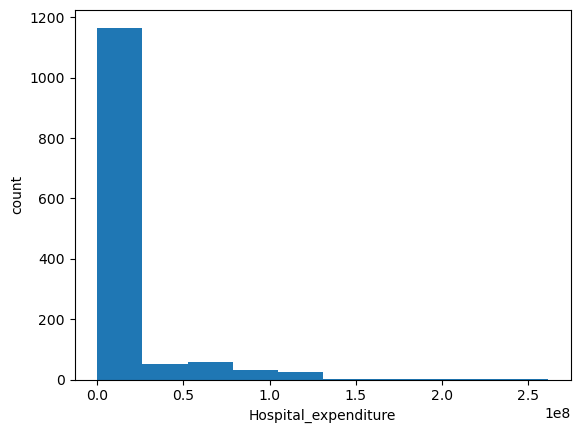

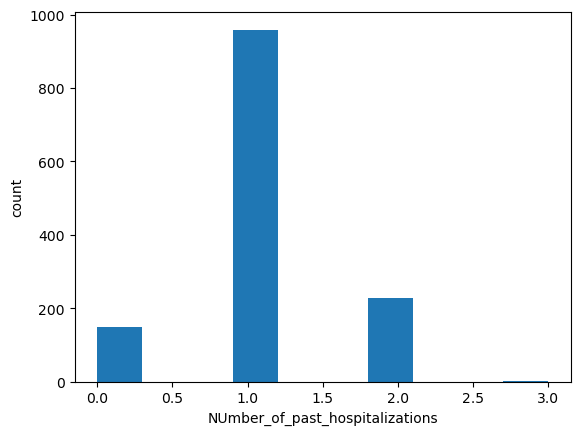

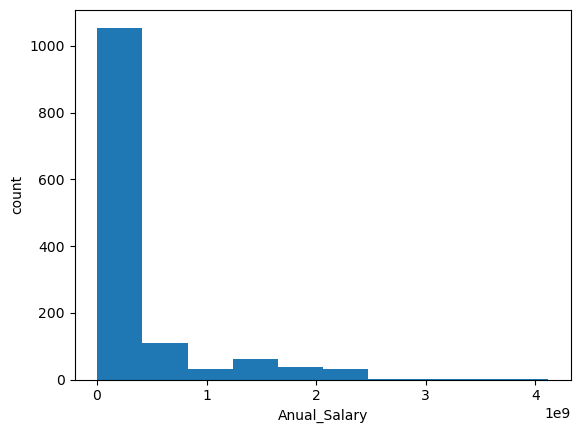

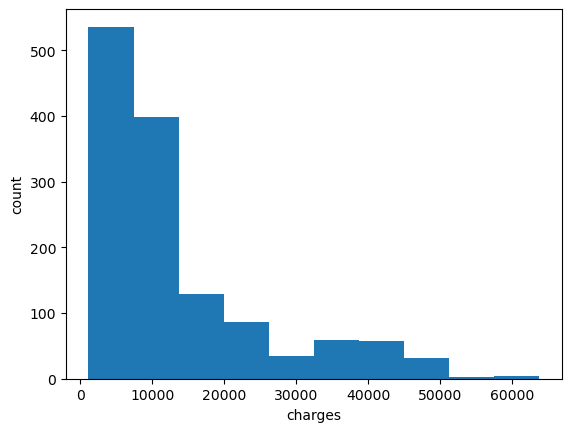

In [36]:
for col_name in col:
    if (df[col_name].dtypes == 'int64' or df[col_name].dtypes == 'float64'):
        plt.hist(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

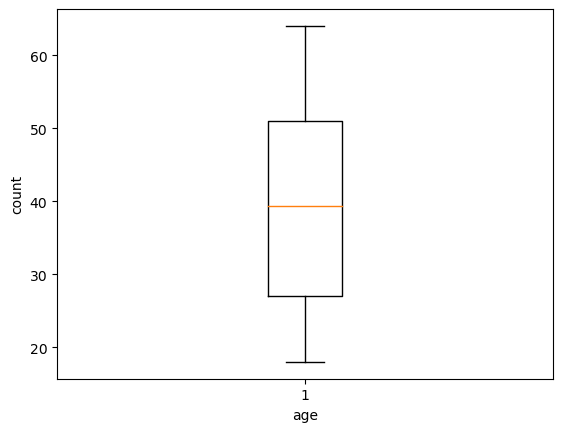

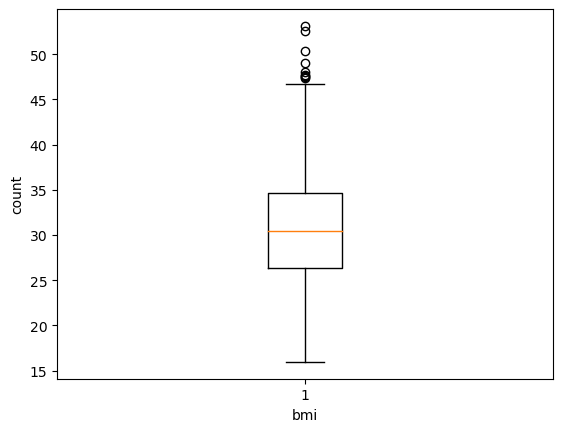

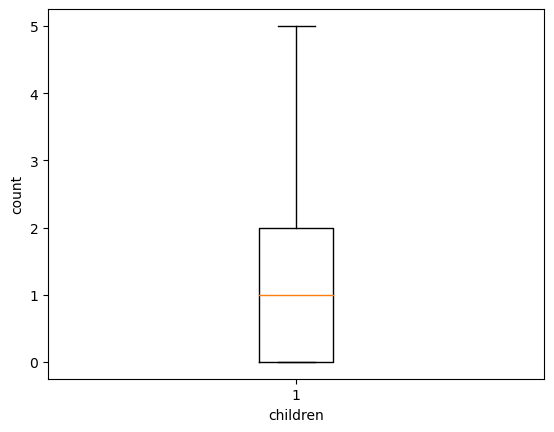

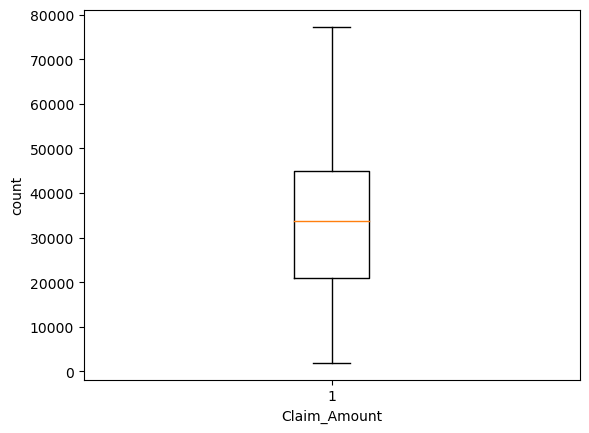

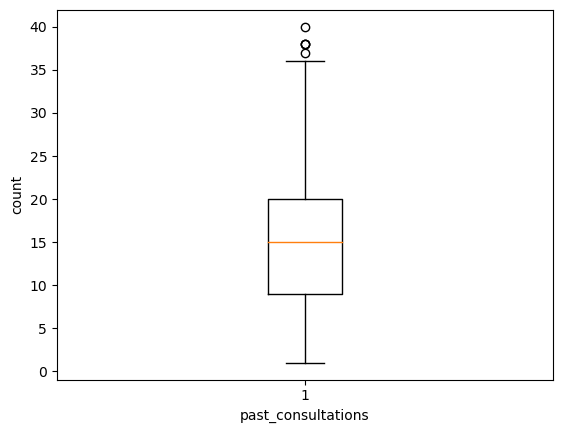

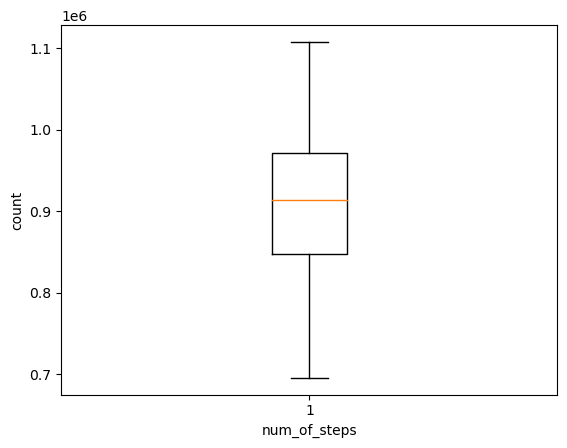

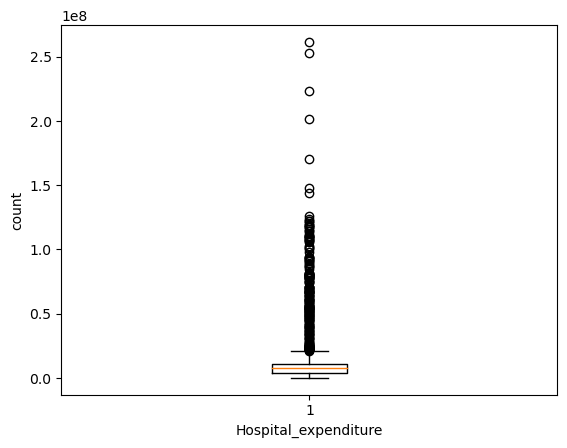

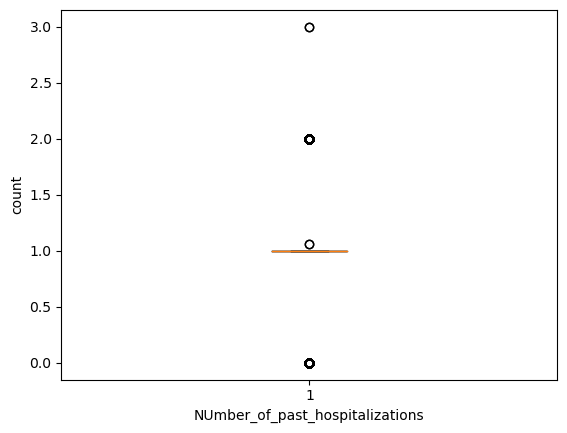

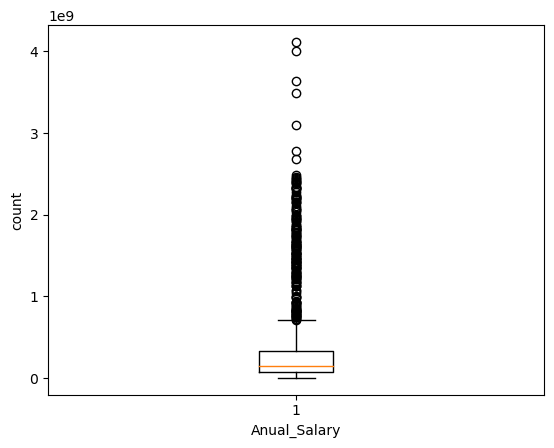

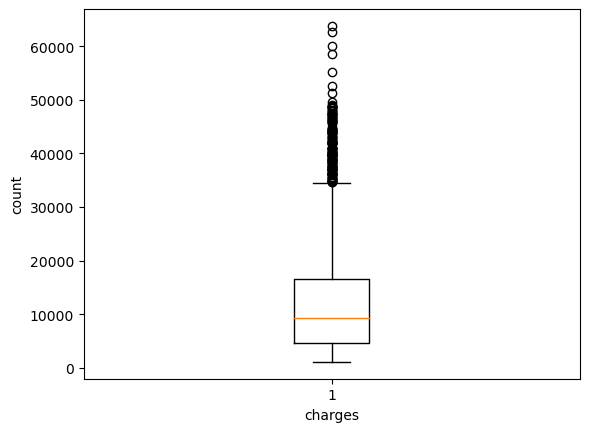

In [37]:
#outlier detection - 10,30,50,1000
for col_name in col:
    if (df[col_name].dtypes == 'int64' or df[col_name].dtypes == 'float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()

In [38]:
#lower limit - Q1-1.5*IQR
#upper limit - Q3+1.5*IQR

In [39]:
Q1=df['bmi'].quantile(0.25) #Quartile1
Q3=df["bmi"].quantile(0.75)

In [42]:
IQR = Q3-Q1

In [43]:
IQR

8.341249999999999

In [44]:
##Lower limit
Q1-1.5*IQR

13.803125000000003

In [45]:
##Upper limit
Q3+1.5*IQR

47.168124999999996

In [46]:
df=df[((df['bmi']>Q1-1.5*IQR) & df['bmi']<Q3+1.5*IQR)]

In [51]:
Q1=df['past_consultations'].quantile(0.25) 
Q3=df["past_consultations"].quantile(0.75)

IQR = Q3-Q1

df=df[((df['past_consultations']>Q1-1.5*IQR) & df['past_consultations']<Q3+1.5*IQR)]

Q1=df['Hospital_expenditure'].quantile(0.25) 
Q3=df["Hospital_expenditure"].quantile(0.75)

IQR = Q3-Q1

df=df[((df['Hospital_expenditure']>Q1-1.5*IQR) & df['Hospital_expenditure']<Q3+1.5*IQR)]

Q1=df['NUmber_of_past_hospitalizations'].quantile(0.25) #Quartile1
Q3=df["NUmber_of_past_hospitalizations"].quantile(0.75)

IQR = Q3-Q1

df=df[((df['NUmber_of_past_hospitalizations']>Q1-1.5*IQR) & df['NUmber_of_past_hospitalizations']<Q3+1.5*IQR)]

Q1=df['Anual_Salary'].quantile(0.25) 
Q3=df["Anual_Salary"].quantile(0.75)

IQR = Q3-Q1

df=df[((df['Anual_Salary']>Q1-1.5*IQR) & df['Anual_Salary']<Q3+1.5*IQR)]


In [52]:
df.shape

(1107, 13)

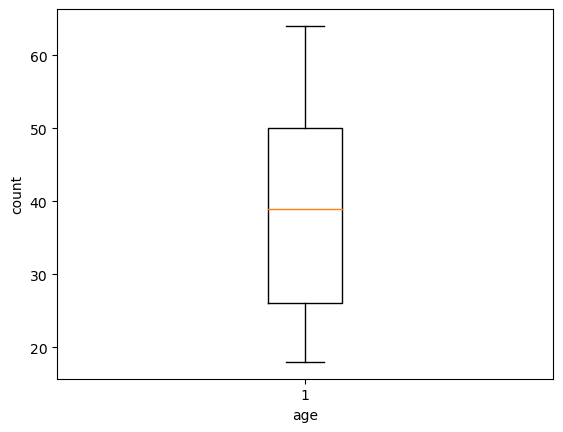

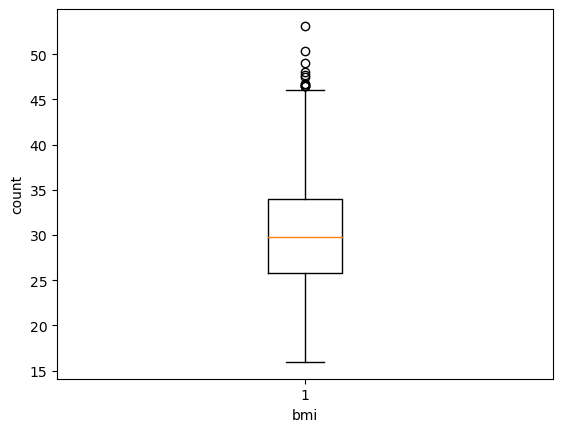

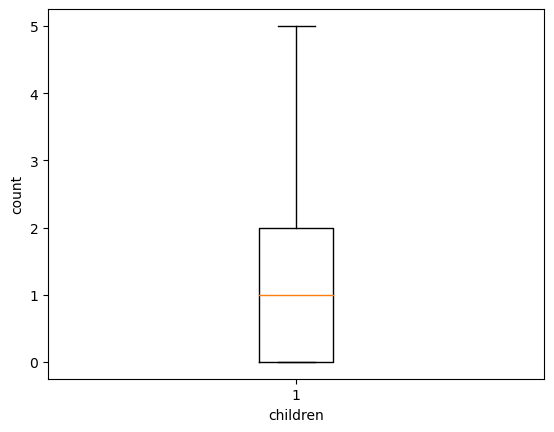

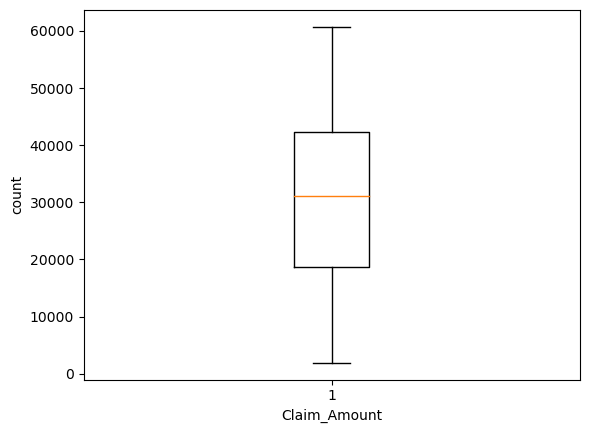

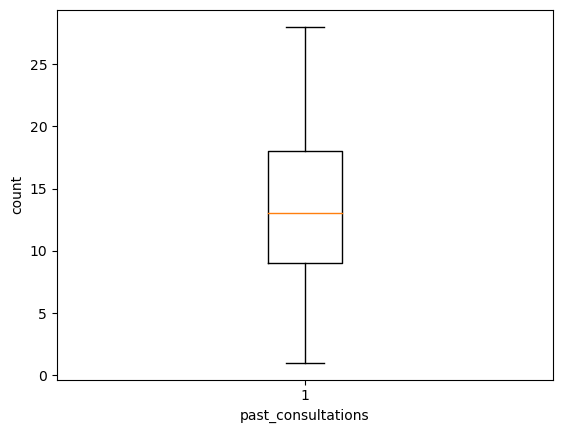

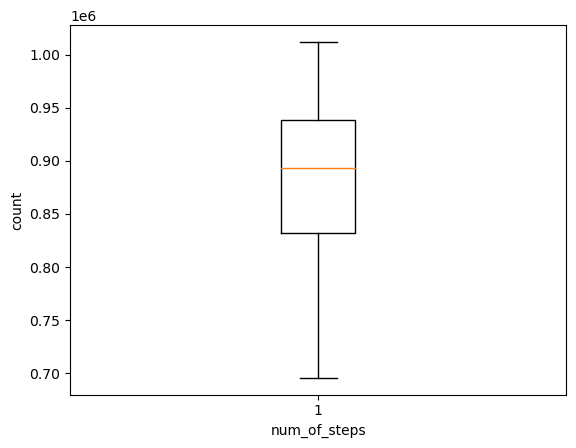

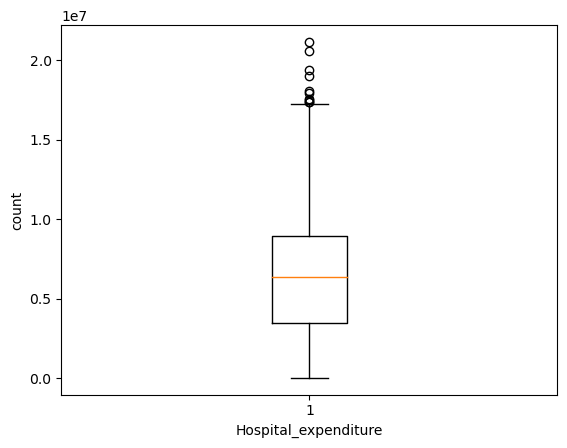

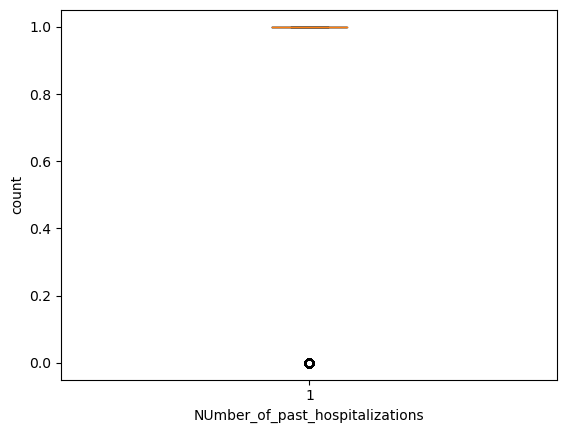

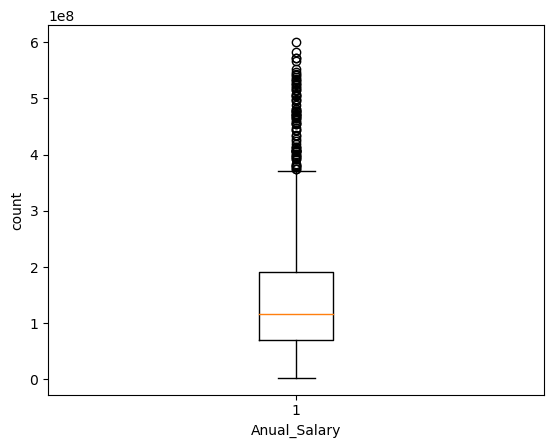

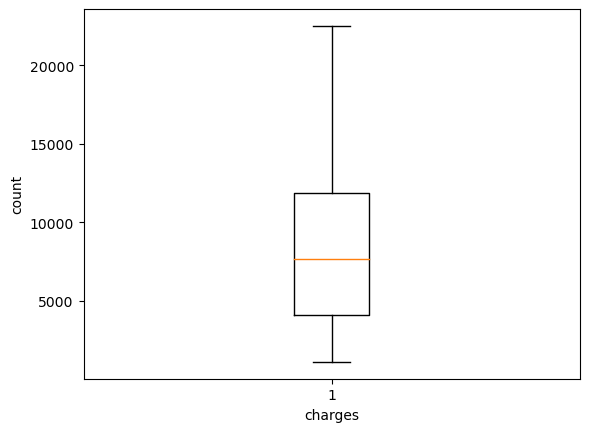

In [53]:
#outlier detection - 10,30,50,1000
for col_name in col:
    if (df[col_name].dtypes == 'int64' or df[col_name].dtypes == 'float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()

In [54]:
##Multicollinearity

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!="object") & (col!='charges')): # only num cols expect target
        col_list.append(col)

In [57]:
col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [58]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!="object") & (col!='charges')): # only num cols expect target
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                           Feature        VIF
0                              age  14.087124
1                              bmi  25.550079
2                         children   2.034632
3                     Claim_Amount   5.817766
4               past_consultations   6.603223
5                     num_of_steps  62.251448
6             Hospital_expenditure   6.117171
7  NUmber_of_past_hospitalizations  12.854751
8                     Anual_Salary   4.883356


In [60]:
df=df.drop(['num_of_steps'],axis=1)

In [61]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!="object") & (col!='charges')): # only num cols expect target
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                           Feature        VIF
0                              age  13.017945
1                              bmi  12.164023
2                         children   2.019839
3                     Claim_Amount   5.352400
4               past_consultations   6.186787
5             Hospital_expenditure   5.844323
6  NUmber_of_past_hospitalizations  11.284981
7                     Anual_Salary   4.785275


In [62]:
df=df.drop(['age'],axis=1)

In [63]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!="object") & (col!='charges')): # only num cols expect target
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                           Feature        VIF
0                              bmi  10.020119
1                         children   1.977556
2                     Claim_Amount   5.327365
3               past_consultations   6.164902
4             Hospital_expenditure   5.834268
5  NUmber_of_past_hospitalizations   8.355608
6                     Anual_Salary   4.641705


In [64]:
df=df.drop(['bmi'],axis=1)

In [65]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!="object") & (col!='charges')): # only num cols expect target
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                           Feature       VIF
0                         children  1.975865
1                     Claim_Amount  4.605396
2               past_consultations  5.320677
3             Hospital_expenditure  5.384634
4  NUmber_of_past_hospitalizations  6.971858
5                     Anual_Salary  4.379501


In [67]:
df=df.drop(['NUmber_of_past_hospitalizations'],axis=1)

In [68]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!="object") & (col!='charges')): # only num cols expect target
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                Feature       VIF
0              children  1.705484
1          Claim_Amount  4.004559
2    past_consultations  4.775503
3  Hospital_expenditure  5.214759
4          Anual_Salary  4.287536


In [70]:
x=df.loc[:,['children','Claim_Amount','past_consultations','Hospital_expenditure','Anual_Salary']]
y=df.iloc[:,-1]

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=99)

In [73]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [77]:
lr.fit(x_train,y_train) ##training

LinearRegression()

In [78]:
y_pred=lr.predict(x_test)

In [79]:
y_pred

array([14688.15713577,  7281.97717565,  2244.90142268,  4464.17847011,
        5486.68748724, 10979.18302328,  7445.4690126 ,  7603.77339484,
       10152.75359638,  8735.97583345,  5485.04095814,  5737.81597155,
        4589.99093851,  7166.92667719,  3777.39533544, 12602.52324442,
        6462.75044446, 11329.4305017 ,  7947.79136798,  2911.91588662,
       14355.25229803,  4945.30579548,  4732.54332788, 12089.93053751,
        2853.02064532,  8223.78301509,  4754.23542851,  8139.07592284,
        3162.95704592,  4743.45726575, 10766.78134765,  9952.83278228,
        7317.52252764, 17746.11186851,  3524.04614838,  5975.67544959,
        9605.36610563,  5348.69351932,  4451.46675174,  7997.52275517,
        6941.004272  , 11446.66805006,  5713.56845213, 16285.67184916,
       16473.60765156,  5101.64833015, 20959.06128533,  5102.37009786,
        6484.92549244,  3885.65244962,  3012.39520629,  6071.56403007,
        7228.85349743,  3736.07393291,  8841.98696466,  7453.07532136,
      

In [81]:
data_diff=pd.DataFrame(columns={'Actual_data','Prediction_data'})

In [82]:
data_diff

,Prediction_data,Actual_data


In [83]:
data_diff['Actual_data']=y_test
data_diff['Prediction_data']=y_test

In [84]:
data_diff

,Prediction_data,Actual_data
971,14455.64405,14455.64405
715,10085.84600,10085.84600
64,1743.21400,1743.21400
137,2396.09590,2396.09590
231,3500.61230,3500.61230
...,...,...
197,3077.09550,3077.09550
346,4846.92015,4846.92015
546,7526.70645,7526.70645
251,3766.88380,3766.88380


In [85]:
from sklearn.metrics import *

In [86]:
accuracy=r2_score(y_test,y_pred)

In [87]:
accuracy

0.8522595305844018